In [1]:
%matplotlib inline
from openTSNE import TSNE
from openTSNE.callbacks import ErrorLogger
import numpy as np
import torch
from matplotlib import pyplot as plt
from matplotlib.patches import Patch

from samplednn.mnistloader import setup_mnist_loader

In [2]:
mnist_test = setup_mnist_loader(train=True)

In [17]:
bayes_ep4 = np.load('models/bayesian/predictions/mnist_train_train/mnist_train_ep004.npy')
np.random.seed(42)
bayes_ep4 = np.random.permutation(bayes_ep4)
bayes_ep4 = np.concatenate(bayes_ep4[::20,::10])

In [3]:
labels = mnist_test.dataset.targets.numpy()
np.random.seed(42)
labels = np.random.permutation(labels)
labels = labels[::20].repeat(10)

In [18]:
tsne = TSNE(
    n_components=2,
    perplexity=100,
    n_jobs=4,
    metric='euclidean',
    callbacks=ErrorLogger(),
    random_state=42
)

In [19]:
%time bayes_emb = tsne.fit(bayes_ep4)

D:\Dokumente\Dissertation\Code\python\samplednn\env\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "env\lib\site-packages\pynndescent\pynndescent_.py", line 38:
    @numba.njit(parallel=True, fastmath=True)
    def init_from_random(n_neighbors, data, query_points, heap, rng_state):
    ^

  self.func_ir.loc))
D:\Dokumente\Dissertation\Code\python\samplednn\env\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "env\lib\site-packages\pynndescent\p

Iteration   50, KL divergence  5.0152, 50 iterations in 4.0773 sec
Iteration  100, KL divergence  4.9756, 50 iterations in 4.2162 sec
Iteration  150, KL divergence  4.9757, 50 iterations in 4.2697 sec
Iteration  200, KL divergence  4.9757, 50 iterations in 4.2929 sec
Iteration  250, KL divergence  4.9757, 50 iterations in 4.3401 sec
Iteration   50, KL divergence  3.2732, 50 iterations in 4.2823 sec
Iteration  100, KL divergence  2.9645, 50 iterations in 4.3908 sec
Iteration  150, KL divergence  2.7990, 50 iterations in 4.3875 sec
Iteration  200, KL divergence  2.6929, 50 iterations in 4.3409 sec
Iteration  250, KL divergence  2.6193, 50 iterations in 4.4251 sec
Iteration  300, KL divergence  2.5651, 50 iterations in 4.7736 sec
Iteration  350, KL divergence  2.5243, 50 iterations in 5.4246 sec
Iteration  400, KL divergence  2.4926, 50 iterations in 5.9647 sec
Iteration  450, KL divergence  2.4676, 50 iterations in 6.2292 sec
Iteration  500, KL divergence  2.4478, 50 iterations in 6.8145

In [21]:
def sort_and_plot(embedding, labels):
    emb_sorted = [x for _,x in sorted(zip(labels, embedding), key=lambda pair: pair[0])]
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.set_ylim([-60,60])
    ax.set_xlim([-60,60])
    ax.set_aspect(1)
    [ax.scatter(d[:,0], d[:,1], s=0.4) for i,d in enumerate(np.array(emb_sorted).reshape(10,-1,2))]
    plt.legend(handles=[Patch(color=plt.cm.tab10(i)) for i in range(10)], labels=[str(i) for i in range(10)], loc='upper left')
    plt.show()

In [ ]:
sort_and_plot(embedding, labels)

In [ ]:
import scipy.stats as st

In [ ]:
def sort_and_plot(embedding, labels):
    emb_sorted = [x for _,x in sorted(zip(labels, embedding), key=lambda pair: pair[0])]
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    [ax.scatter(d[:,0], d[:,1], s=0.4) for d in np.array(emb_sorted).reshape(10,-1,2)]
    plt.show()

In [ ]:
emb_sorted = [x for _,x in sorted(zip(labels, embedding), key=lambda pair: pair[0])]
emb_sorted = np.array(emb_sorted).reshape(10,-1,2)
xx, yy = np.mgrid[-60:60:200j, -60:60:200j]
pos = np.vstack([xx.ravel(), yy.ravel()])
kernel = st.gaussian_kde(emb_sorted[0].transpose())
foo = np.reshape(kernel(pos).T, xx.shape)

In [ ]:
plt.contour(xx,yy,foo)

In [ ]:
def contour_plot(embedding, labels):
    emb_sorted = [x for _,x in sorted(zip(labels, embedding), key=lambda pair: pair[0])]
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    xx, yy = np.mgrid[-60:60:200j, -60:60:200j]
    pos = np.vstack([xx.ravel(), yy.ravel()])
    for i,d in enumerate(np.array(emb_sorted).reshape(10,-1,2)):
        kernel = st.gaussian_kde(d.T)
        density = np.reshape(kernel(pos).T, xx.shape)
        ax.contour(xx, yy,density, colors=[plt.cm.tab10(i)], levels=3)
    plt.legend(handles=[Patch(color=plt.cm.tab10(i)) for i in range(10)], labels=[str(i) for i in range(10)], loc='upper left')
    plt.show()

In [ ]:
contour_plot(embedding, labels)

In [ ]:
bayes_ep3 = np.load('models/bayesian/predictions/mnist_train_train/mnist_train_ep003.npy')
np.random.seed(42)
bayes_ep3 = np.random.permutation(bayes_ep3)
bayes_ep3 = np.concatenate(bayes_ep3[::20,::10])

In [ ]:
emb_ep3 = embedding.transform(bayes_ep3)

In [ ]:
contour_plot(emb_ep3, labels)

In [ ]:
sort_and_plot(emb_ep3, labels)

In [ ]:
tsne2 = openTSNE.TSNE(
    n_components=2,
    perplexity=100,
    n_jobs=4,
    metric='euclidean',
    callbacks=ErrorLogger(),
    random_state=42
)

In [ ]:
emb_ep3_nooose = tsne2.fit(bayes_ep3)

In [ ]:
sort_and_plot(-emb_ep3_nooose, labels)

In [6]:
drop_ep4 = np.load('models/dropout/predictions/mnist_train_train/mnist_train_ep004.npy')
np.random.seed(42)
drop_ep4 = np.random.permutation(drop_ep4)
drop_ep4 = np.concatenate(drop_ep4[::20,::10])

In [4]:
tsne_drop = TSNE(
    n_components=2,
    perplexity=100,
    n_jobs=4,
    metric='euclidean',
    callbacks=ErrorLogger(),
    random_state=42
)

In [7]:
drop_emb_ep4 = tsne_drop.fit(drop_ep4)

D:\Dokumente\Dissertation\Code\python\samplednn\env\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "env\lib\site-packages\pynndescent\rp_trees.py", line 133:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
D:\Dokumente\Dissertation\Code\python\samplednn\env\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "env\lib\site-packages\pynndescent\rp_trees.py

Iteration   50, KL divergence  4.5213, 50 iterations in 3.7585 sec
Iteration  100, KL divergence  4.2514, 50 iterations in 3.9994 sec
Iteration  150, KL divergence  4.2081, 50 iterations in 4.2632 sec
Iteration  200, KL divergence  4.1976, 50 iterations in 3.9839 sec
Iteration  250, KL divergence  4.1946, 50 iterations in 3.9205 sec
Iteration   50, KL divergence  2.8468, 50 iterations in 3.8102 sec
Iteration  100, KL divergence  2.4624, 50 iterations in 3.7719 sec
Iteration  150, KL divergence  2.2534, 50 iterations in 3.8871 sec
Iteration  200, KL divergence  2.1165, 50 iterations in 3.7799 sec
Iteration  250, KL divergence  2.0190, 50 iterations in 4.0241 sec
Iteration  300, KL divergence  1.9456, 50 iterations in 4.5778 sec
Iteration  350, KL divergence  1.8887, 50 iterations in 5.5008 sec
Iteration  400, KL divergence  1.8434, 50 iterations in 5.8639 sec
Iteration  450, KL divergence  1.8066, 50 iterations in 6.4997 sec
Iteration  500, KL divergence  1.7769, 50 iterations in 6.8019

In [ ]:
sort_and_plot(drop_emb_ep4, labels)

In [ ]:
drop_ep3 = np.load('models/dropout/predictions/mnist_train_train/mnist_train_ep003.npy')
np.random.seed(42)
drop_ep3 = np.random.permutation(drop_ep3)
drop_ep3 = np.concatenate(drop_ep3[::20,::10])

In [ ]:
drop_emb_ep3 = drop_emb_ep4.transform(drop_ep3)

In [ ]:
sort_and_plot(drop_emb_ep3, labels)

In [ ]:
drop_emb_ep3_nooose = tsne_drop.fit(drop_ep3)

In [ ]:
sort_and_plot(drop_emb_ep3_nooose, labels)

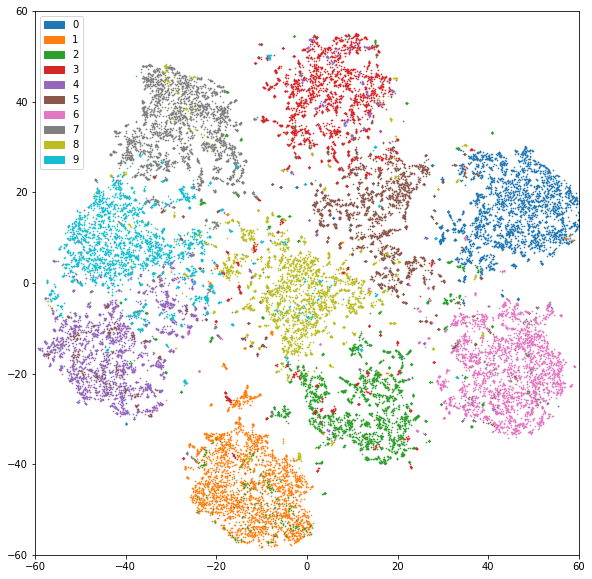

In [11]:
sort_and_plot(drop_emb_ep4, labels)

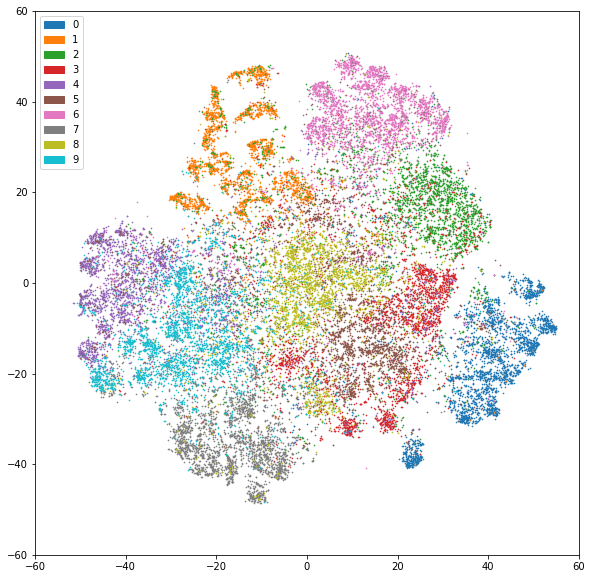

In [22]:
sort_and_plot(bayes_emb, labels)

In [13]:
labels_sorted = np.sort(labels)
drop_sorted = [x for _,x in sorted(zip(labels, drop_emb_ep4), key=lambda pair: pair[0])]

In [23]:
bayes_sorted = [x for _,x in sorted(zip(labels, bayes_emb), key=lambda pair: pair[0])]

In [14]:
indices = np.add.accumulate(np.unique(labels_sorted, return_counts=True)[1])

In [15]:
drop_clusters = np.split(drop_sorted, indices[:-1])

In [24]:
bayes_clusters = np.split(bayes_sorted, indices[:-1])

In [53]:
len(drop_clusters[0])

3010

In [54]:
import scipy.spatial as spsp

In [56]:
hull = spsp.ConvexHull(drop_clusters[0])

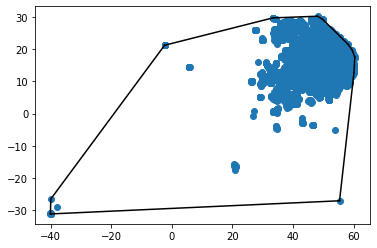

In [66]:
plt.plot(drop_clusters[0][:,0], drop_clusters[0][:,1], 'o')
for simplex in hull.simplices:
    plt.plot(drop_clusters[0][simplex, 0], drop_clusters[0][simplex, 1], 'k-')

In [83]:
foo = np.ma.array(drop_clusters[0],mask=False)
foo.mask[hull.vertices] = True

In [80]:
hull2 = spsp.ConvexHull(foo)

ValueError: Input points cannot be a masked array

In [89]:
foo[~foo.mask[:,0]].data

array([[48.23073225, 28.63617906],
       [47.84821511, 29.37095855],
       [47.6484397 , 29.11695256],
       ...,
       [56.70985041,  9.94664568],
       [57.30500695,  9.87387639],
       [57.00456876,  9.79075994]])

In [92]:
def remove(arr, indices):
    mask = np.repeat(True, len(arr))
    mask[indices] = False
    return arr[mask]

In [101]:
removed = remove(drop_clusters[0], hull.vertices)
hull2 = spsp.ConvexHull(removed)

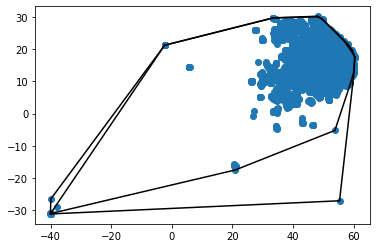

In [103]:
plt.plot(drop_clusters[0][:,0], drop_clusters[0][:,1], 'o')
for simplex in hull.simplices:
    plt.plot(drop_clusters[0][simplex, 0], drop_clusters[0][simplex, 1], 'k-')
for simplex in hull2.simplices:
    plt.plot(removed[simplex, 0], removed[simplex, 1], 'k-')

In [110]:
def peeled_convex_hull(points, n_peel):
    hull = spsp.ConvexHull(points)
    if n_peel == 0:
        return hull
    else:
        mask = np.repeat(True, len(points))
        mask[hull.vertices] = False
        masked = points[mask]
        return peeled_convex_hull(masked,n_peel-1)

In [105]:
foo = drop_clusters[0]

In [107]:
peeled_convex_hull(foo,4)

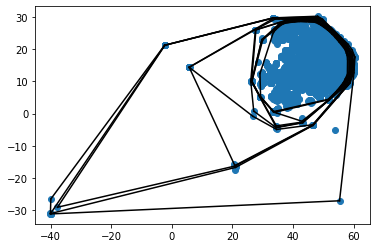

In [124]:
foo = drop_clusters[0]
plt.plot(foo[:,0], foo[:,1], 'o')
for n_peel in range(0,22,2):
    bar = peeled_convex_hull(foo,n_peel)
    for simplex in bar.simplices:
        plt.plot(bar._points[simplex, 0], bar._points[simplex, 1], 'k-')

In [122]:
[x for x in range(0,20,2)]

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

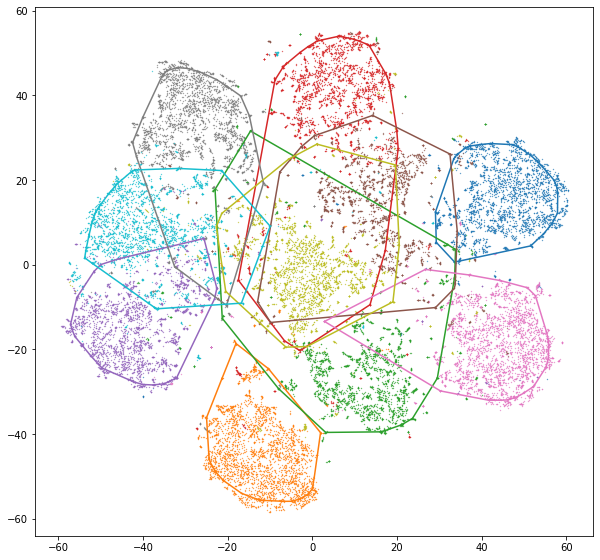

In [137]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_aspect(1)
for i,c in enumerate(drop_clusters):
    plt.scatter(c[:,0],c[:,1],s=0.1)
    ch = peeled_convex_hull(c, 20)
    for simplex in ch.simplices:
        ax.plot(ch._points[simplex, 0], ch._points[simplex, 1],color=plt.cm.tab10(i))

In [139]:
hull.volume

4360.892222323496

In [ ]:
    hull = spsp.ConvexHull(points)
    if n_peel == 0:
        return hull
    else:
        mask = np.repeat(True, len(points))
        mask[hull.vertices] = False
        masked = points[mask]
        return peeled_convex_hull(masked,n_peel-1)

In [143]:
foo = [peeled_convex_hull(drop_clusters[2],i).volume for i in range(0,60,2)]

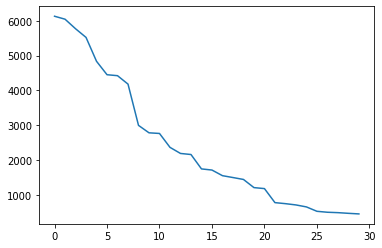

In [144]:
plt.plot(foo)

In [145]:
hull.__dict__

{'_qhull': None, 'simplices': array([[ 888,  885],
        [2423, 2658],
        [2423,  885],
        [ 886,  883],
        [ 886, 1122],
        [2091, 1190],
        [2091, 1122],
        [1874, 1305],
        [ 549, 1190],
        [ 549, 1305],
        [ 880,  883],
        [ 880,  888],
        [2654, 2658],
        [2654, 1874]], dtype=int32), 'neighbors': array([[ 2, 11],
        [12,  2],
        [ 0,  1],
        [10,  4],
        [ 6,  3],
        [ 8,  6],
        [ 4,  5],
        [ 9, 13],
        [ 5,  9],
        [ 7,  8],
        [ 3, 11],
        [ 0, 10],
        [ 1, 13],
        [ 7, 12]], dtype=int32), 'equations': array([[ 4.27588059e-02, -9.99085424e-01, -2.93964517e+01],
        [ 9.98310422e-01, -5.81059511e-02, -5.92514332e+01],
        [ 9.92907543e-01, -1.18889067e-01, -5.81555549e+01],
        [-9.99514103e-01,  3.11698267e-02, -3.90487955e+01],
        [-7.86063340e-01,  6.18145958e-01, -1.49856101e+01],
        [-3.45397558e-02,  9.99403325e-01, -2.855658

In [16]:
for i,c in enumerate(drop_clusters):
    np.savetxt('reports/dropout_ep04_cl{:02}.csv'.format(i), c, delimiter=",")

In [10]:
'xxx{:02}xx'.format(5)

'xxx05xx'

In [25]:
for i,c in enumerate(bayes_clusters):
    np.savetxt('reports/bayes_ep04_cl{:02}.csv'.format(i), c, delimiter=",")